In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.font_manager as font_manager
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline
font_prop = font_manager.FontProperties(size=18)
plt.rcParams["font.family"] = "Times"
angle = 13.5
files = glob.glob("./dither/test_{}_*.fits".format(angle))
len(files)

35

In [2]:
science = []
calib = []
known_spec = []
ra = []
dec = []
for i in files:
    data2 = Table.read(i, hdu = 2, format='fits')
    data1 = Table.read(i, hdu = 1, format='fits')
    ra.append(float(i.split("_")[2].split(".fits")[0]))
    dec.append(float(i.split("_")[3].split(".fits")[0]))
    #masking for assignment allocation
    assigned_SCIENCEfibers = ((data2['assigned'] == 1) & (data1['category'] == 'science'))
    assigned_CALIBfibers = ((data2['assigned'] == 1) & ((data1['category'] == 'sky_boss') | (data1['category'] == 'standard_boss')))


    #Carton breakdown
    assigned_known = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_known_spec'))
    #assigned_core = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_core'))
    #assigned_var = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_var'))
    #assigned_ancil = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_ancillary'))
    
    science.append(len(data1[assigned_SCIENCEfibers]))
    calib.append(len(data1[assigned_CALIBfibers]))
    known_spec.append(len(data1[assigned_known]))

science = np.array(science)
calib = np.array(calib)
known_spec = np.array(known_spec)
ra = np.array(ra)
dec = np.array(dec)
len(known_spec)

35

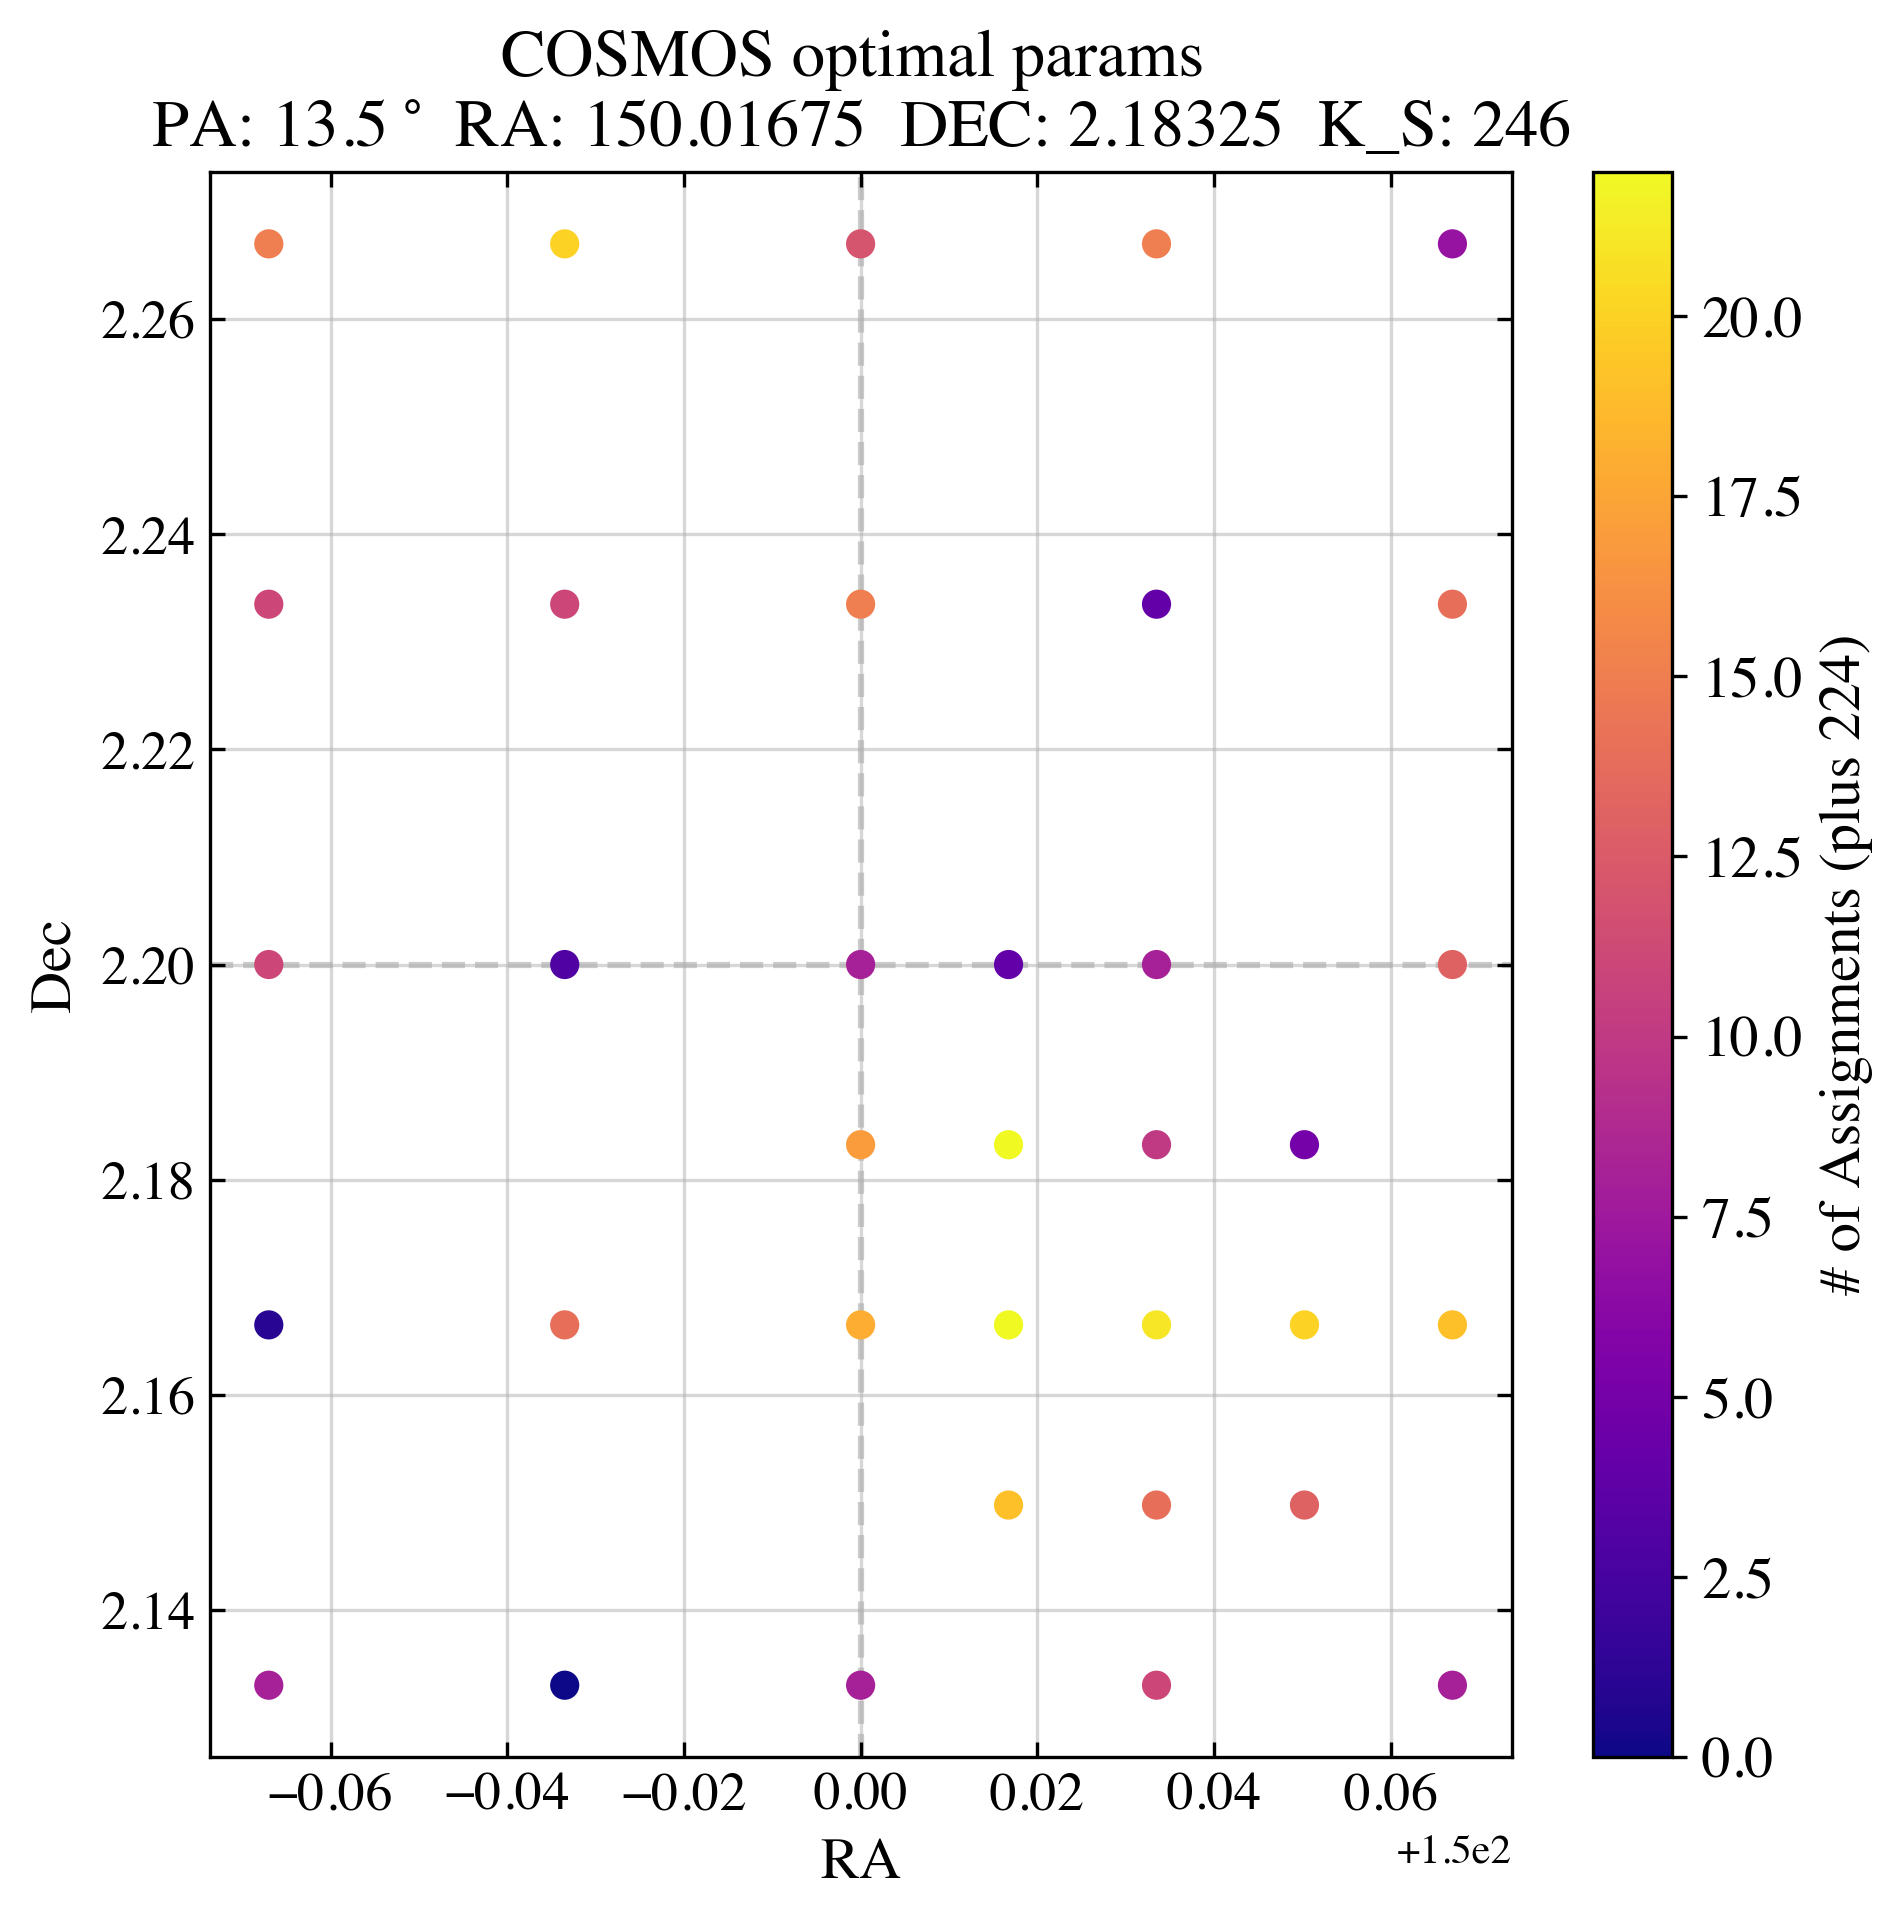

In [4]:
%matplotlib inline
cols = known_spec-np.min(known_spec)
size = 14

#fig
fig, ax = plt.subplots(figsize=(7, 7), dpi=300, facecolor='white')
#field center lines
ax.axvline(x=150.0, linestyle='--', color='black',alpha=0.2, zorder=0)
ax.axhline(y=2.2, linestyle='--', color='black', alpha=0.2, zorder=0)
#plot
ec = ax.scatter(ra, dec, c=cols,cmap='plasma', label="Known Spec")
ax.set_xlabel('RA', fontsize=size)
ax.set_ylabel('Dec', fontsize=size)

#colorbar stuff
cbar = plt.colorbar(ec)
cbar.set_label('# of Assignments (plus {})'.format(np.min(known_spec)), fontsize=size)
cbar.ax.tick_params(labelsize=size)

#label the max knownspec ra and dec


#labels, etc
ax.set_xlabel('RA', fontsize=size)
ax.set_ylabel('Dec', fontsize=size)
ax.set_title("COSMOS optimal params \n"+ r"PA: {}$^\circ$ RA: {}  DEC: {:.7}  K_S: {}".format(angle, ra[np.argmax(known_spec)], dec[np.argmax(known_spec)],known_spec[np.argmax(known_spec)]), fontsize=size+2)
ax.tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
plt.grid(alpha=0.5)
ax.set_axisbelow(True)        

#plt.savefig("dither_testing_COSMOS{}.png".format(angle), facecolor=fig.get_facecolor(), bbox_inches='tight',dpi=300)

In [39]:
#cenmask = (ra == 213.7041666) & (dec == 53.083333)
print(ra[np.argmax(known_spec)],dec[np.argmax(known_spec)], known_spec[np.argmax(known_spec)], calib[np.argmax(known_spec)])


150.01675 2.2335000000000003 248 120


In [33]:
np.max(known_spec)

329

In [ ]:
plt.scatter(ra, science, alpha=0.75,label="Total Science")
plt.scatter(ra, known_spec, alpha=0.75,label="Known Spec")
plt.xlabel("RA")
plt.ylabel("# of Assignments")
plt.hlines(325, 35.6, np.max(ra))
plt.grid(alpha=0.5)
plt.title("dither RAtesting")
plt.legend(loc=(1.1, 0.5))
#plt.savefig("dither_testing.png", bbox_inches='tight',dpi=300)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(ra, dec, known_spec, c='r', marker='o', label ='known spec')
ax.scatter(ra, dec, science, c='b', marker='^', label = 'science')

ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_zlabel('# of assignments')
ax.legend(loc=(1.1, 0.5))
plt.show()

In [ ]:
max_mask = (known_spec >= 325)
print(ra[max_mask], dec[max_mask], known_spec[max_mask])

In [ ]:
min_mask = (known_spec <= 315)
print(ra[min_mask], dec[min_mask], known_spec[min_mask])